# Mandril with multiple experts, and suboptimal experts

In [59]:
from mab.expertTest import ExpertTest
import torch
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

In [23]:
paths = {
    "perfect": "banditk5n10/perfect",
    "rand_from_2_best": "banditk5n10/rand_from_2_best",
    "rand_from_3_best": "banditk5n10/rand_from_3_best",
    "rand_from_rand_best_2": "banditk5n10/rand_from_rand_best_2",
#     "rand_from_rand_best_3": "banditk5n10/rand_from_rand_best_3",
    "rand_from_rand_best_4": "banditk5n10/rand_from_rand_best_4",
    "rand_from_rand_best_5": "banditk5n10/rand_from_rand_best_5",
}

paths_batch_size_50 = {
    "perfect": "banditk5n10/perfect_meta-batch-size-50",
    "rand_from_2_best": "banditk5n10/rand_from_2_best_meta-batch-size-50",
    "rand_from_3_best": "banditk5n10/rand_from_3_best_meta-batch-size-50",
}

names = list(paths.keys())

### Shapes of data:

In [24]:
experts = {}
for expert, path in paths.items():
    print(expert)
    print(path)
    experts[expert] = ExpertTest(path)

perfect
banditk5n10/perfect
rand_from_2_best
banditk5n10/rand_from_2_best
rand_from_3_best
banditk5n10/rand_from_3_best
rand_from_rand_best_2
banditk5n10/rand_from_rand_best_2
rand_from_rand_best_4
banditk5n10/rand_from_rand_best_4
rand_from_rand_best_5
banditk5n10/rand_from_rand_best_5


In [25]:
display(perfect.logs["tasks"].shape)
display(perfect.logs["train_returns"].shape)
display(perfect.logs["valid_returns"].shape)

(2000,)

(2000, 10)

(2000, 10)

In [63]:
def iterate_for_all(fun, experts):
    for name, expert in experts.items():
        print("\n", name.upper())
        print("-----------------------------------------------------------------")
        fun(expert)
        print("-----------------------------------------------------------------")


## Disaply data:

In [64]:
def display_task(ind, expert):
    print("tasks:")
    display(expert.logs["tasks"][ind])
    print("Training:")
    print("  actions")
    display(expert.logs["train_actions"][ind])
    print("  returns")
    display(expert.logs["train_returns"][ind])
    print("Validation:")
    print("  actions")
    display(expert.logs["valid_actions"][ind])
    print("  returns")
    display(expert.logs["valid_returns"][ind])

In [65]:
rand_ind = np.random.randint(len(experts[names[0]].logs["tasks"]))
display_with_ind = partial(display_task, rand_ind)
iterate_for_all(display_with_ind, experts)


 PERFECT
-----------------------------------------------------------------
tasks:


{'mean': array([0.91681981, 0.48849388, 0.47594568, 0.87491724, 0.29964871])}

Training:
  actions


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

  returns


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

Validation:
  actions


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

  returns


array([2., 2., 2., 2., 2., 2., 1., 2., 2., 2.], dtype=float32)

-----------------------------------------------------------------

 RAND_FROM_2_BEST
-----------------------------------------------------------------
tasks:


{'mean': array([0.91681981, 0.48849388, 0.47594568, 0.87491724, 0.29964871])}

Training:
  actions


array([[3., 0., 0., 0., 3., 0., 0., 0., 3., 0.]], dtype=float32)

  returns


array([1., 1., 1., 1., 1., 0., 1., 1., 0., 1.], dtype=float32)

Validation:
  actions


array([[0., 3., 0., 3., 3., 0., 3., 3., 0., 3.],
       [0., 0., 3., 0., 3., 3., 3., 3., 0., 3.]], dtype=float32)

  returns


array([2., 2., 2., 1., 2., 2., 2., 1., 2., 2.], dtype=float32)

-----------------------------------------------------------------

 RAND_FROM_3_BEST
-----------------------------------------------------------------
tasks:


{'mean': array([0.91681981, 0.48849388, 0.47594568, 0.87491724, 0.29964871])}

Training:
  actions


array([[0., 0., 3., 1., 0., 0., 1., 1., 0., 1.]], dtype=float32)

  returns


array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1.], dtype=float32)

Validation:
  actions


array([[3., 3., 1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 0., 3., 1., 0., 0., 3., 1., 1., 0.]], dtype=float32)

  returns


array([1., 1., 2., 2., 2., 2., 2., 2., 1., 2.], dtype=float32)

-----------------------------------------------------------------

 RAND_FROM_RAND_BEST_2
-----------------------------------------------------------------
tasks:


{'mean': array([0.91681981, 0.48849388, 0.47594568, 0.87491724, 0.29964871])}

Training:
  actions


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

  returns


array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

Validation:
  actions


array([[0., 3., 0., 3., 3., 3., 0., 0., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

  returns


array([2., 1., 2., 2., 2., 2., 2., 2., 1., 2.], dtype=float32)

-----------------------------------------------------------------

 RAND_FROM_RAND_BEST_4
-----------------------------------------------------------------
tasks:


{'mean': array([0.91681981, 0.48849388, 0.47594568, 0.87491724, 0.29964871])}

Training:
  actions


array([[3., 0., 3., 0., 0., 0., 0., 3., 0., 0.]], dtype=float32)

  returns


array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1.], dtype=float32)

Validation:
  actions


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

  returns


array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.], dtype=float32)

-----------------------------------------------------------------

 RAND_FROM_RAND_BEST_5
-----------------------------------------------------------------
tasks:


{'mean': array([0.91681981, 0.48849388, 0.47594568, 0.87491724, 0.29964871])}

Training:
  actions


array([[0., 3., 0., 3., 0., 0., 0., 0., 3., 0.]], dtype=float32)

  returns


array([1., 1., 1., 1., 1., 0., 1., 1., 0., 1.], dtype=float32)

Validation:
  actions


array([[3., 0., 3., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 3., 0., 1., 1., 3., 3., 3., 0.]], dtype=float32)

  returns


array([2., 2., 2., 2., 2., 1., 1., 1., 2., 1.], dtype=float32)

-----------------------------------------------------------------


## Average reward for each expert, and for each trainee
We also want to see how many times the trainee chose what arm - according to the best to worst.

In [66]:
def display_mean(expert):
    display(expert.logs["train_returns"].mean())
    display(expert.logs["valid_returns"].mean())

In [67]:
iterate_for_all(display_mean, experts)


 PERFECT
-----------------------------------------------------------------


0.83115

1.65435

-----------------------------------------------------------------

 RAND_FROM_2_BEST
-----------------------------------------------------------------


0.7441

1.49055

-----------------------------------------------------------------

 RAND_FROM_3_BEST
-----------------------------------------------------------------


0.66845

1.322

-----------------------------------------------------------------

 RAND_FROM_RAND_BEST_2
-----------------------------------------------------------------


0.78875

1.567

-----------------------------------------------------------------

 RAND_FROM_RAND_BEST_4
-----------------------------------------------------------------


0.7102

1.3958

-----------------------------------------------------------------

 RAND_FROM_RAND_BEST_5
-----------------------------------------------------------------


0.74155

1.4989

-----------------------------------------------------------------


## Display actions by sorted index
Meaning we sort the means from the greatest to the smallest, and then look at the actions taken in relation to these.

In [69]:
for name, expert in experts.items():
    expert.get_sorted()

### Histograms of the actions taken
The actions are sorted from best to worst, i.e. 0 is the best actions, and 4 is the worst.

In [74]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [75]:
def draw_hists(name, expert, ax):
    valid = np.histogram(expert.valid_sorted.reshape(-1).numpy(), bins=5, range=[0,5])
    train = np.histogram(expert.train_sorted.reshape(-1).numpy(), bins=5, range=[0,5])
    
    width = 0.35
    N_valid = len(expert.valid_sorted.reshape(-1))
    N_train = len(expert.train_sorted.reshape(-1))
    
    r0 = ax.bar(np.arange(5) - width / 2, valid[0] / N_valid, width, label="Validation")
    r1 = ax.bar(np.arange(5) + width / 2, train[0] / N_train, width, label="Training")
    autolabel(r0, ax)
    autolabel(r1, ax)
    ax.set_title(name)
    ax.legend()

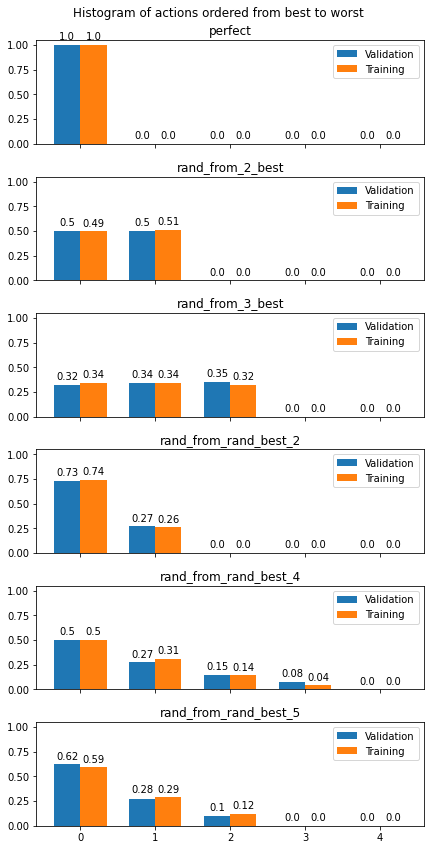

In [77]:
fig, axs = plt.subplots(len(names),1, sharex=True, sharey=True, figsize=(6, 2 * len(names)))
ax_count = 0
for name, expert in experts.items():
    draw_hists(name, expert, axs[ax_count])
    ax_count += 1

fig.suptitle("Histogram of actions ordered from best to worst")
fig.tight_layout()
plt.show()

So it looks like the agent learns to replicate the expert in randomly choosing what the expert chooses.

I would be interesting to train it with 100 steps, to see if it does choose the one with more gain more.

## Now for multiple agents at the same time
If we take a random **k** each time, we'll try and see if the agent learns to follow the better experts more.